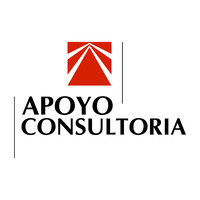

# Proyeccion

Esta libreria construye la proyeccion de nowcast usando la metodologia especificada en el punto XX.XX del informe. Se busca obtener proyecciones trimestrales usando informacion mensual y que se pueda manejar el problema de informacion faltante sin tener que realizar proyecciones de las variables faltantes.

Esta libreria realiza la proyeccion.


In [23]:
import pykalman as kalman
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import os

from ipynb.fs.defs.ConstruccionBasedeDatos import BasedeDatos
from ipynb.fs.defs.nowcast_kalman import kalman_fed_nyc

from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

import pickle
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [24]:
rutaOrigen = 'inputs/'
rutaDestino = 'resultados/'
rutaModelos = 'model_nowcast/'


# Variables a proyectar en frecuencia mensual

In [25]:
y = ['imae_Mensual_VariacionAnual']

X = [ 'ipc1_trp_Mensual_VariacionAnual',
  ]

# Construccion de Base de datos

In [26]:
bd_mensual_t,bd_trimestral_t,bd_anual_t,bd_all = BasedeDatos(rutaOrigen + 'bd_Panama.xlsx')

# Importando resultados de la estimacion

In [27]:
with open(rutaModelos + 'nowcast_model.pkl', 'rb') as file:
    kalman = pickle.load(file)

In [28]:
X,y,n_factors,params,initial_state_mean,initial_state_covariance, _, _ = kalman

In [29]:
X

['ipc1_trp_Mensual_VariacionAnual']

In [30]:
_, _, bd_S, bd_F, bd_P, bd, bd_data = kalman_fed_nyc(bd_all,X,y,n_factors,params,
                                             initial_state_mean,initial_state_covariance,0)

In [35]:
bd_S

,NoObservale_Suavizada_0,NoObservale_Suavizada_1,NoObservale_Suavizada_2
per,,,
2004-01-01,-0.007281,0.006359,-0.014964
2004-02-01,-0.000376,-0.012891,-0.023628
2004-03-01,0.008237,0.041184,-0.043833
2004-04-01,0.008883,0.011241,-0.027821
2004-05-01,0.006304,-0.021278,-0.013674
...,...,...,...
2019-08-01,-0.027822,-0.001739,-0.029076
2019-09-01,-0.026949,0.005114,-0.040138
2019-10-01,-0.026592,-0.001113,-0.042876


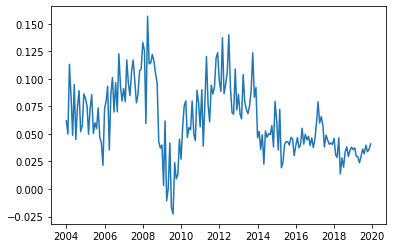

In [36]:
plt.plot(bd_P[y])


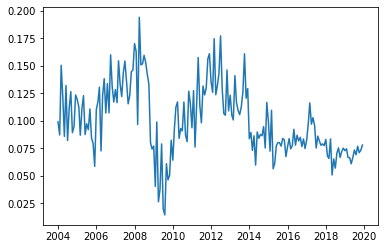

In [37]:
plt.plot(bd_P[X])